In [1]:
# optimizing t and r

import math
import numpy as np

def find_q_prob (theta_input, T):
     # ensure that Pr(find q) >= 0.99
    R = math.log(1-0.1**(1/T)) / math.log(1 - (theta_input/math.pi))
    return {"prob" : 1 - ((1 - (1 - (theta_input / math.pi))**R)**T), "r" : R}

def checkProb(theta_input, T, R):
    return 1 - ((1 - (1 - (theta_input / math.pi))**R)**T)


def y_checked(theta, T, R):
    return 1 - ((1 - (1 - (theta / math.pi))**R)**T)


for u in range(1,1000000000):

    theta_upper = np.arccos(0.6)
    prob_find_q_output = find_q_prob(theta_upper, u)

    R = prob_find_q_output["r"] # get r such that check image prob >= 0.99

    theta_lower = np.arccos(0.1) 

    prob_lower = checkProb(theta_lower, u, R)

    if prob_lower <= 0.1:
        print("r: " + str(R))
        print("t: " + str(u))
        print("Pr upper:" + str(prob_find_q_output["prob"]))
        print("Pr lower: " + str(prob_lower))
        print(1 - ((1 - (1 - (np.arccos(0.4) / math.pi))**R)**u))
        print(1 - ((1 - (1 - (np.arccos(0.2) / math.pi))**R)**u))

        break

r: 10.924716580370566
t: 104
Pr upper:0.9
Pr lower: 0.09982659289017959
0.4943741244386548
0.18127229874204964


In [1]:
import numpy as np
import pandas as pd
import pickle
import joblib
import final_project_source

pickle_in = open('2011-2021-data-final', 'rb')
dataset = pickle.load(pickle_in)

dataset_sub = dataset

df_features = dataset_sub.iloc[:, 0:-6]
df_features["Tournament_Game"] = dataset_sub["Tournament_Game"]
df_labels = dataset_sub.iloc[:, -6:-1]

df_features = (df_features - np.mean(df_features, axis=0)) / (np.std(df_features, axis=0))

df_features = df_features.drop(columns=["Tournament_Game", "Away_Games Played", "Home_Games Played"], axis=1)

df_features

,Home_Tm,Home_Opp,Home_FG,Home_FGA,Home_FG%,Home_3P,Home_3PA,Home_3P%,Home_FT,Home_FTA,...,Away_BLK%,Away_eFG%,Away_TOV%,Away_ORB%,Away_FT/FGA,Away_Def_eFG%,Away_Def_TOV%,Away_Def_DRB%,Away_Def_FT/FGA,N
0,0.197167,0.314180,0.653379,-1.135814,1.969908,-0.433473,-1.700641,2.497206,-0.291333,0.655725,...,0.258187,1.155785,4.354230,2.039519,-1.951588,2.127671,0.913767,-2.722780,0.362787,3.024111
0,-2.027203,0.715604,-2.279572,-0.914644,-2.519511,-0.985373,-0.492025,-1.264401,0.025697,-0.766369,...,2.367218,1.520272,-0.861059,2.976590,0.319954,-0.555594,0.120905,1.390998,-1.128117,-0.330676
0,0.073591,0.447988,-0.324271,-0.693473,0.088867,0.118427,-0.975472,2.006562,0.976787,2.314836,...,-0.536124,1.730128,1.216908,2.005444,0.219739,1.541411,3.753320,-2.763612,-1.767076,-0.330676
0,-1.780051,0.447988,-1.953688,-0.251132,-2.544591,-0.985373,-0.008579,-1.836819,0.025697,-0.292338,...,-1.713894,-4.322573,-1.268503,-0.993185,1.338807,2.488446,0.692503,-0.946608,-1.685158,3.024111
0,-0.173561,-0.890094,-0.650155,-1.578156,0.490156,-2.641073,-2.425811,-2.858995,2.561938,5.396041,...,-1.768674,-2.444910,-0.820314,-0.567243,-1.517323,1.924735,0.803135,-0.129977,0.788760,3.024111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2.236173,-0.221053,2.771621,1.075892,2.371197,0.394377,0.112283,0.187089,0.659757,0.181694,...,0.751207,0.272179,-0.575848,0.233527,-0.615387,-0.645788,-1.261995,0.360002,-1.291952,3.024111
0,0.938624,-0.555574,1.305146,0.191210,1.292733,0.394377,-0.250302,0.483520,0.025697,-0.410846,...,-0.344393,0.205908,-1.594459,-0.005000,-0.348147,0.323795,-0.782590,0.788733,-0.865980,3.024111
0,1.185776,-0.221053,1.631029,1.075892,1.242572,1.774126,0.958314,1.618135,-0.925394,-1.003385,...,1.353788,-0.048129,-1.574086,1.741360,-0.423308,-1.164402,0.452800,0.941851,0.575773,3.024111
0,2.297961,-0.087245,2.934563,1.075892,2.446439,0.118427,0.233144,0.166645,0.659757,0.181694,...,-0.344393,0.205908,-1.594459,-0.005000,-0.348147,0.323795,-0.782590,0.788733,-0.865980,3.024111


In [ ]:
# building and exporting machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

LR = LinearRegression()
MLP = MLPRegressor()
RF = RandomForestRegressor()

LR.fit(df_features, df_labels.iloc[:, :2])
MLP.fit(df_features, df_labels.iloc[:, :2])
RF.fit(df_features, df_labels.iloc[:, :2])

joblib.dump(LR, 'LR_model.joblib')
joblib.dump(MLP, 'MLP_model.joblib')
joblib.dump(RF, 'RF_model.joblib')

In [2]:
rand_game = df_features.iloc[25000, :]

sims = []

def cos_sim(x,y):
    dot_prod = np.dot(x,y)
    norm_x = np.linalg.norm(x, 2)
    norm_y = np.linalg.norm(y, 2)

    return (dot_prod) / (norm_x * norm_y)

for s in range(len(df_features)):
    if s != 25000:
        sims.append(cos_sim(rand_game, df_features.iloc[s, :]))

    if s % 1000 == 0:
        print(str(s // 1000) + "/50")

0/50
1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50


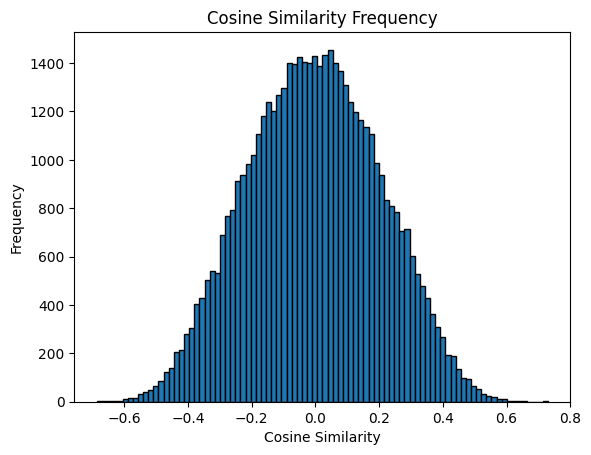

In [3]:
# generate frequency plot

import matplotlib.pyplot as plt

plt.hist(sims, bins='auto', edgecolor='black')

plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Frequency')

plt.show()

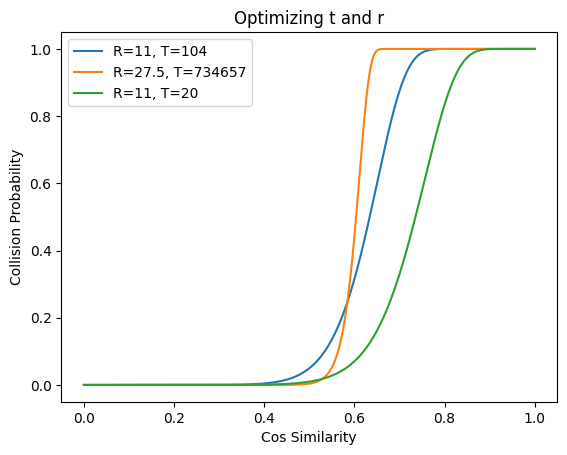

In [5]:
# generate jicard similarity plot

import matplotlib.pyplot as plt

T_ideal = 734657
R_ideal = 27.5

r = 11
t = 104

real_r = 11
real_t = 20


def jicard_pr(cos, T, R):
    return 1 - ((1 - ((cos)**R))**T)

theta_values = np.linspace(0, 1.0, 1000)

real_values = jicard_pr(theta_values, t, r)
ideal_values = jicard_pr(theta_values, T_ideal, R_ideal)
actual_values = jicard_pr(theta_values, real_t, real_r)

# Plot the function
plt.plot(theta_values, real_values, label=f'R={r}, T={t}')
plt.plot(theta_values, ideal_values, label=f'R={R_ideal}, T={T_ideal}')
plt.plot(theta_values, actual_values, label=f'R={real_r}, T={real_t}')
plt.title('Optimizing t and r')
plt.xlabel('Cos Similarity')
plt.ylabel('Collision Probability')
plt.legend()
plt.show()